In [3]:
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd

In [6]:
data =pd.read_csv("C:/Users/Lenovo/Desktop/COVID_19_Datasets-master/csse_covid_19_daily_reports_us.csv")
data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [7]:
#number of coloumns and rows
data.shape

(58, 18)

In [8]:
#what is types of attributes
data.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [9]:
#finding the correlation
data.corr()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
Lat,1.000000,-0.278274,0.120959,0.120024,0.043318,0.120148,-0.374943,0.245693,0.084769,0.065030,-0.189675,0.774106,0.309579,-0.162856
Long_,-0.278274,1.000000,0.009998,0.028772,-0.043379,0.011654,0.367911,0.041318,-0.077781,0.280909,0.318569,-0.526908,0.190191,0.251661
Confirmed,0.120959,0.009998,1.000000,0.982191,0.876856,0.985218,-0.096696,0.711776,0.828022,0.989936,0.383425,0.153972,0.334032,0.327376
Deaths,0.120024,0.028772,0.982191,1.000000,0.856295,0.954378,-0.075053,0.712117,0.741730,0.992313,0.427721,0.120043,0.345441,0.325817
Recovered,0.043318,-0.043379,0.876856,0.856295,1.000000,0.809437,-0.013571,0.592014,0.950785,0.962082,0.362330,0.166898,0.252155,0.302197
Active,0.120148,0.011654,0.985218,0.954378,0.809437,1.000000,-0.092276,0.703931,0.829687,0.976456,0.368403,0.146354,0.322773,0.332398
FIPS,-0.374943,0.367911,-0.096696,-0.075053,-0.013571,-0.092276,1.000000,-0.220264,-0.194011,0.013433,-0.262258,0.058022,-0.092705,-0.172665
Incident_Rate,0.245693,0.041318,0.711776,0.712117,0.592014,0.703931,-0.220264,1.000000,0.441669,0.725370,0.373338,0.264768,0.620621,0.258029
People_Tested,0.084769,-0.077781,0.828022,0.741730,0.950785,0.829687,-0.194011,0.441669,1.000000,0.906210,0.231301,0.236043,0.230753,0.356618
People_Hospitalized,0.065030,0.280909,0.989936,0.992313,0.962082,0.976456,0.013433,0.725370,0.906210,1.000000,0.509658,0.013433,0.331753,0.377586


In [10]:
#null values
data.isnull().sum(axis=0)

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [11]:
#length of data
len(data)

58

In [12]:
#finding mean,std,min,max
data.describe()


,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,58.000000,58.000000,42.000000,58.000000,58.000000,56.000000,5.600000e+01,33.000000,57.000000,5.800000e+01,56.000000,33.000000
mean,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3894.186870,14.342541
std,10.887035,49.754449,52562.031122,4084.750891,11674.490020,41294.705318,17408.350591,402.682539,2.987834e+05,13185.628145,2.135002,2.378302e+07,1933.169297,5.047403
min,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,97.702058,6.778043
25%,34.594600,-101.165775,2596.000000,74.000000,970.000000,812.500000,18.250000,148.521021,4.608100e+04,535.000000,3.072626,8.400001e+07,2712.800274,10.000000
50%,39.061850,-87.944200,10148.500000,385.000000,3008.000000,5644.500000,32.500000,250.477287,1.386545e+05,1493.000000,4.403318,8.400003e+07,3469.782532,13.598326
75%,42.361650,-76.970625,29395.500000,1394.250000,7326.750000,19291.250000,47.750000,477.888542,2.796948e+05,4389.000000,5.466238,8.400004e+07,4763.649736,17.658649
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [14]:
data.Active.value_counts()

27655.0     1
744.0       1
82500.0     1
82904.0     1
248.0       1
548.0       1
2.0         1
66.0        1
1108.0      1
7899.0      1
967.0       1
10386.0     1
116082.0    1
6.0         1
4152.0      1
27310.0     1
22.0        1
3716.0      1
646.0       1
7832.0      1
761.0       1
48.0        1
24.0        1
100.0       1
49.0        1
1044.0      1
0.0         1
39.0        1
29224.0     1
6865.0      1
2251.0      1
3317.0      1
4965.0      1
37207.0     1
45375.0     1
11788.0     1
2741.0      1
38104.0     1
3919.0      1
19715.0     1
4657.0      1
6085.0      1
263848.0    1
19906.0     1
5204.0      1
3197.0      1
6324.0      1
6675.0      1
10984.0     1
2403.0      1
10888.0     1
27410.0     1
63356.0     1
18020.0     1
17934.0     1
6459.0      1
95893.0     1
12530.0     1
Name: Active, dtype: int64

In [15]:
data.FIPS.value_counts().head()

56    1
18    1
30    1
29    1
28    1
Name: FIPS, dtype: int64

In [18]:
data.ISO3.value_counts()

USA    53
ASM     1
GUM     1
MNP     1
VIR     1
PRI     1
Name: ISO3, dtype: int64

In [19]:
data.Confirmed.value_counts()

7551      1
154       1
18971     1
2866      1
49        1
944       1
2095      1
6317      1
8167      1
20262     1
1567      1
68126     1
3868      1
1819      1
14906     1
53009     1
21        1
787       1
401       1
22797     1
32908     1
5003      1
88970     1
11528     1
17670     1
15620     1
643       1
8194      1
7710      1
8507      1
29436     1
11967     1
13052     1
39801     1
150776    1
13356     1
35316     1
11122     1
47471     1
85997     1
18412     1
39017     1
5532      1
103       1
13413     1
478       1
7388      1
100418    1
29274     1
3801      1
9175      1
42323     1
4177      1
51673     1
2506      1
69        1
354370    1
0         1
Name: Confirmed, dtype: int64

In [20]:
data.Province_State.value_counts()

Delaware                    1
Maine                       1
Alaska                      1
Indiana                     1
New Jersey                  1
Oklahoma                    1
New Hampshire               1
New Mexico                  1
Utah                        1
North Carolina              1
Virginia                    1
Colorado                    1
Nebraska                    1
Maryland                    1
Georgia                     1
Missouri                    1
Arkansas                    1
North Dakota                1
South Dakota                1
Wyoming                     1
New York                    1
District of Columbia        1
Guam                        1
Iowa                        1
California                  1
American Samoa              1
Alabama                     1
Minnesota                   1
Connecticut                 1
Ohio                        1
Washington                  1
Idaho                       1
Kentucky                    1
Louisiana 

In [21]:
data.Country_Region.value_counts()

US    58
Name: Country_Region, dtype: int64

In [22]:
data.Deaths.value_counts()

0        2
407      2
377      1
2096     1
46       1
4525     1
299      1
3497     1
144      1
4770     1
1697     1
2123     1
283      1
538      1
1299     1
786      1
17       1
16       1
1037     1
138      1
11       1
522      1
393      1
6        1
5        1
3        1
2        1
305      1
125      1
1075     1
10749    1
376      1
2608     1
1781     1
747      1
54       1
107      1
481      1
28636    1
10       1
90       1
726      1
640      1
1426     1
77       1
73       1
202      1
3529     1
1864     1
69       1
5060     1
49       1
190      1
570      1
310      1
6066     1
Name: Deaths, dtype: int64

In [23]:
data.Recovered.value_counts()

11783.0    1
1100.0     1
11637.0    1
8362.0     1
13.0       1
1302.0     1
1882.0     1
1275.0     1
336.0      1
440.0      1
2826.0     1
30341.0    1
473.0      1
1668.0     1
578.0      1
125.0      1
1059.0     1
6264.0     1
3478.0     1
3852.0     1
1406.0     1
1030.0     1
824.0      1
61.0       1
5451.0     1
3023.0     1
23945.0    1
28234.0    1
4266.0     1
4423.0     1
2993.0     1
3965.0     1
7681.0     1
3773.0     1
26249.0    1
61886.0    1
528.0      1
7728.0     1
12227.0    1
950.0      1
4523.0     1
352.0      1
Name: Recovered, dtype: int64

In [26]:
crosstable = pd.crosstab(data['FIPS'],data['ISO3'])
crosstable

ISO3,ASM,GUM,MNP,PRI,USA,VIR
FIPS,,,,,,
1,0,0,0,0,1,0
2,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,1,0
8,0,0,0,0,1,0
9,0,0,0,0,1,0
10,0,0,0,0,1,0
11,0,0,0,0,1,0


In [27]:
dic = {'USA':'60'}
s = data.ISO3.map(dic)
data.FIPS= data.FIPS.combine_first(s)
data.FIPS.value_counts()

56       1
18       1
30       1
29       1
28       1
27       1
26       1
25       1
24       1
23       1
22       1
21       1
20       1
19       1
17       1
31       1
16       1
15       1
13       1
12       1
11       1
10       1
9        1
8        1
6        1
5        1
4        1
2        1
99999    1
32       1
33       1
34       1
78       1
72       1
69       1
66       1
60       1
88888    1
55       1
54       1
53       1
51       1
50       1
49       1
48       1
47       1
46       1
45       1
44       1
42       1
41       1
40       1
39       1
38       1
37       1
36       1
35       1
1        1
Name: FIPS, dtype: int64

In [28]:
data.isnull().sum(axis=0)

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [30]:
data['Total Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])
total_active = data['Total Active'].sum()
print('Total number of active COVID 2019 cases :', total_active)
Tot_Cases = data.groupby('Province_State')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Reds')

Total number of active COVID 2019 cases : 645679.0


,Total Active
Province_State,
New York,263848.000000
New Jersey,116082.000000
Maryland,37207.000000
Connecticut,29224.000000
Virginia,27310.000000
Texas,19906.000000
Michigan,19715.000000
Colorado,18020.000000
Rhode Island,11788.000000


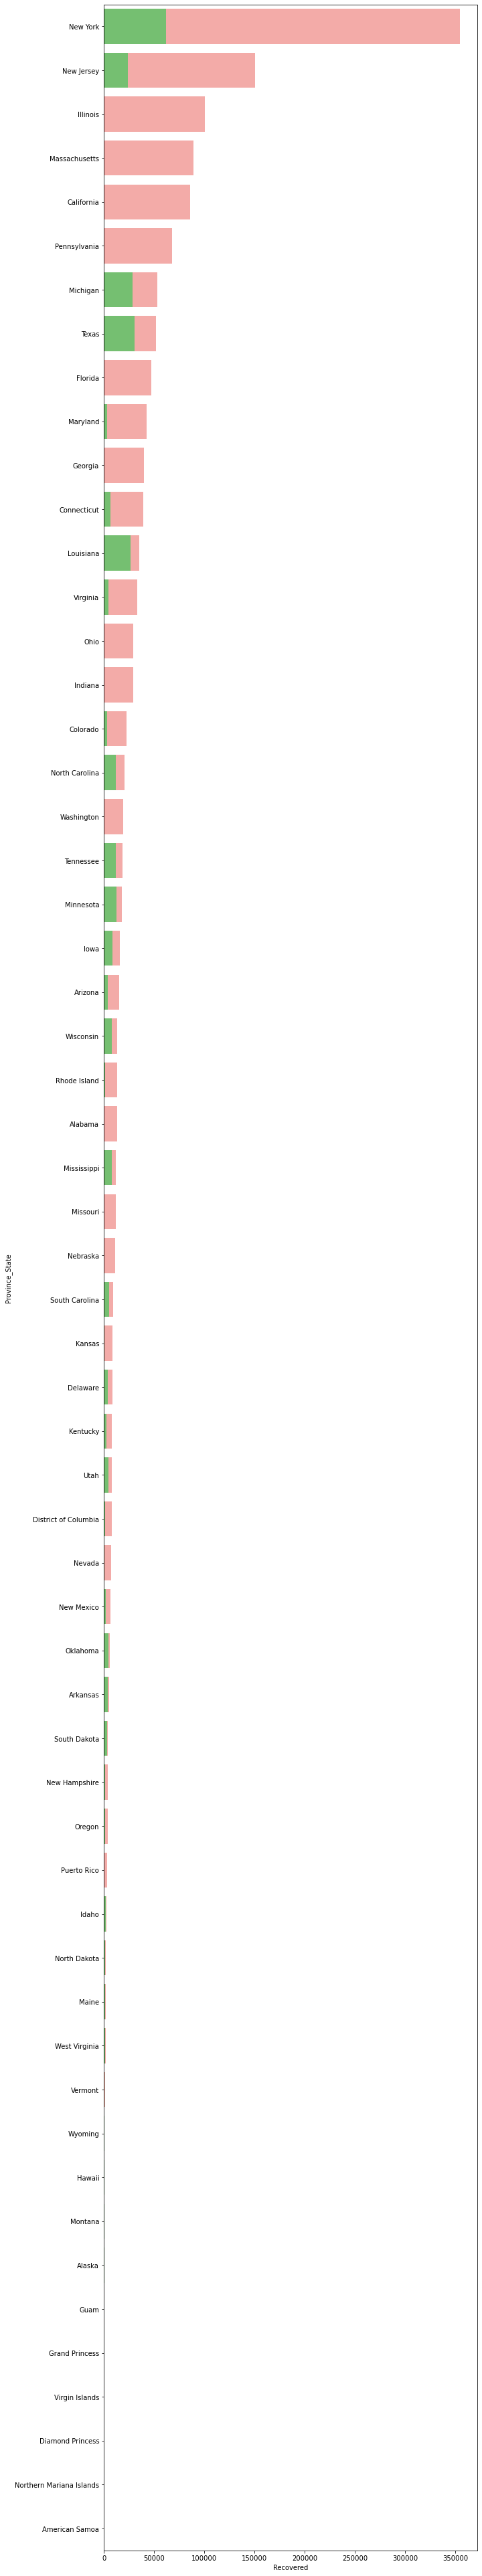

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 70))
data = data[['Province_State','Confirmed','Recovered','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="Province_State", data=data,label="Total", color="r")
sns.set_color_codes("muted")
sns.barplot(x="Recovered", y="Province_State", data=data, label="Recovered", color="g")


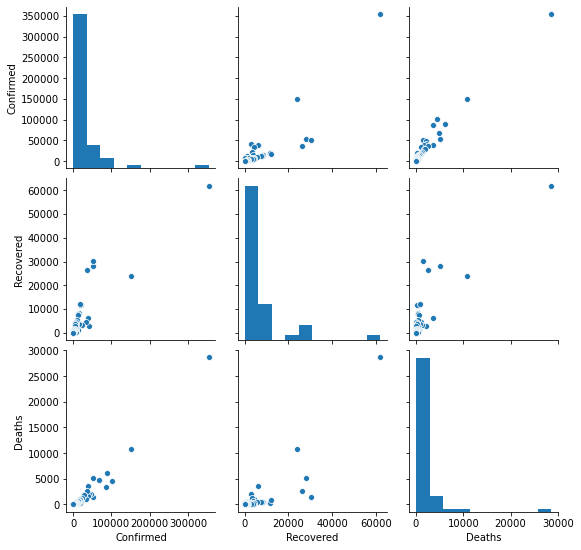

In [35]:
sns.pairplot(data)

In [36]:
data['Total Active'] = data['Confirmed'] - (data['Deaths'] + data['Recovered'])
total_active = data['Total Active'].sum()

In [37]:
df_grouped=data.groupby(['Province_State']).sum()
df_grouped.Confirmed

Province_State
Alabama                      13052
Alaska                         401
American Samoa                   0
Arizona                      14906
Arkansas                      5003
California                   85997
Colorado                     22797
Connecticut                  39017
Delaware                      8194
Diamond Princess                49
District of Columbia          7551
Florida                      47471
Georgia                      39801
Grand Princess                 103
Guam                           154
Hawaii                         643
Idaho                         2506
Illinois                    100418
Indiana                      29274
Iowa                         15620
Kansas                        8507
Kentucky                      8167
Louisiana                    35316
Maine                         1819
Maryland                     42323
Massachusetts                88970
Michigan                     53009
Minnesota                    17670
Missi

In [38]:
df_grouped=data.groupby(['Province_State']).sum()
df_grouped.Recovered

Province_State
Alabama                         0.0
Alaska                        352.0
American Samoa                  0.0
Arizona                      3773.0
Arkansas                     3852.0
California                      0.0
Colorado                     3478.0
Connecticut                  6264.0
Delaware                     3965.0
Diamond Princess                0.0
District of Columbia         1059.0
Florida                         0.0
Georgia                         0.0
Grand Princess                  0.0
Guam                          125.0
Hawaii                        578.0
Idaho                        1668.0
Illinois                        0.0
Indiana                         0.0
Iowa                         8362.0
Kansas                        473.0
Kentucky                     2826.0
Louisiana                   26249.0
Maine                        1100.0
Maryland                     2993.0
Massachusetts                   0.0
Michigan                    28234.0
Minnesota    

In [39]:
df_grouped=data.groupby(['Province_State']).sum()
df_grouped.Deaths

Province_State
Alabama                       522
Alaska                         10
American Samoa                  0
Arizona                       747
Arkansas                      107
California                   3497
Colorado                     1299
Connecticut                  3529
Delaware                      310
Diamond Princess                0
District of Columbia          407
Florida                      2096
Georgia                      1697
Grand Princess                  3
Guam                            5
Hawaii                         17
Idaho                          77
Illinois                     4525
Indiana                      1864
Iowa                          393
Kansas                        202
Kentucky                      376
Louisiana                    2608
Maine                          73
Maryland                     2123
Massachusetts                6066
Michigan                     5060
Minnesota                     786
Mississippi                   570

In [40]:
total=data['Confirmed']-(data['Recovered']+data['Deaths'])

In [123]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)
np.isnan(total)
np.where(np.isnan(total))
np.nan_to_num(data)
pd.DataFrame(data).fillna(data)

,Province_State,Confirmed,Recovered,Deaths,Total Active
36,New York,354370,61886.000000,28636,263848.000000
34,New Jersey,150776,23945.000000,10749,116082.000000
17,Illinois,100418,7007.428571,4525,15373.309524
25,Massachusetts,88970,7007.428571,6066,15373.309524
5,California,85997,7007.428571,3497,15373.309524
43,Pennsylvania,68126,7007.428571,4770,15373.309524
26,Michigan,53009,28234.000000,5060,19715.000000
49,Texas,51673,30341.000000,1426,19906.000000
11,Florida,47471,7007.428571,2096,15373.309524
24,Maryland,42323,2993.000000,2123,37207.000000


In [124]:
plot=df_grouped.nlargest(5,'Confirmed')
plot

,Confirmed,Recovered,Deaths,Total Active
Province_State,,,,
New York,354370,61886.0,28636,263848.0
New Jersey,150776,23945.0,10749,116082.0
Illinois,100418,0.0,4525,0.0
Massachusetts,88970,0.0,6066,0.0
California,85997,0.0,3497,0.0


In [125]:
data.select_dtypes(include=['object']).columns

Index(['Province_State'], dtype='object')

In [126]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder

In [127]:

y_train=data['Total Active']

In [128]:
x_train=data.drop(['Province_State'],axis=1)

In [129]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2, random_state=0)

In [130]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

In [131]:
x_test.fillna(x_train.mean(), inplace=True)

In [132]:
x_test = x_test.fillna(x_train.mean())

In [133]:
x_test._is_view

False

In [134]:
np.where(total.values >= np.finfo(np.float64).max)


(array([], dtype=int64),)

In [135]:
np.isnan(total.values.any())

False

In [136]:
col_mask=data.isnull().any(axis=0)

In [137]:
row_mask=data.isnull().any(axis=1)

In [138]:
data.loc[row_mask,col_mask]

""


In [139]:
data[data==np.inf]=np.nan
data.fillna(data.mean(), inplace=True)

In [140]:
def replace_missing_value(data, number_features):

    imputer = Imputer(strategy="median")
    data_num = data[number_features]
    imputer.fit(data_num)
    x_test = imputer.transform(data_num)
    res_def = pd.DataFrame(x_test, columns=data_num.columns)
    return res_def

In [141]:
number_features = ['median_income', 'gdp']

In [142]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [143]:
data.fillna(999, inplace=True)

In [144]:
pip=Pipeline([('scaler2',StandardScaler()),('RandomForestRegressor:',RandomForestRegressor())])
pip.fit(x_train,y_train)
prediction=pip.predict(x_test)

In [145]:
acc=pip.score(x_test,y_test)
acc

0.9991125786236034

In [147]:
import sys

In [148]:
sys.executable

'C:\\Users\\Lenovo\\anaconda3\\python.exe'

In [152]:
import joblib
import sklearn
svc = sklearn.svm.SVC()

In [153]:
joblib.dump(svc, 'Covid-19.pkl')

['Covid-19.pkl']